# Logistic Regression in SciKit Learn - Lab

## Introduction 

In this lab, we are going to fit a logistic regression model to a dataset concerning heart disease. Whether or not a patient has heart disease is indicated in the final column labelled 'target'. 1 is for positive for heart disease while 0 indicates no heart disease.

## Objectives
You will be able to:

* Understand and implement logistic regression
* Compare testing and training errors

## Let's get started!

In [1]:
#Starter Code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Starter Code
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


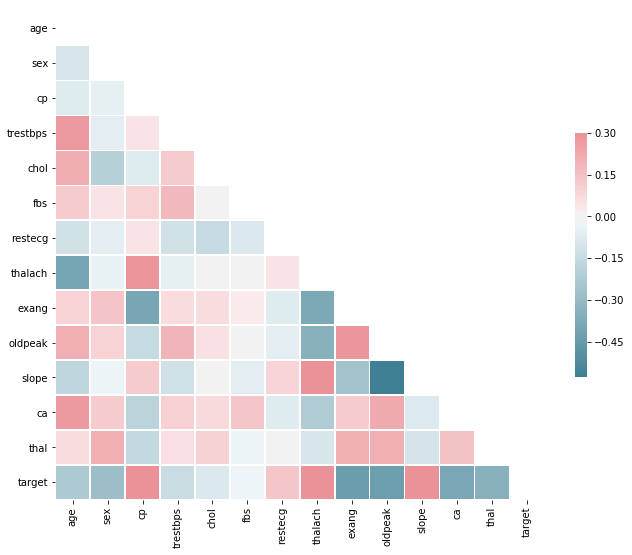

In [3]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Define appropriate X and y
Recall the dataset is whether or not a patient has heart disease and is indicated in the final column labelled 'target'. With that, define appropriate X and y in order to model whether or not a patient has heart disease.

In [7]:
#Your code here 
X = df.iloc[:,:-1]
y = df['target']

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Normalize the Data
Normalize the data prior to fitting the model.

In [9]:
#Your code here
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


## Train Test Split
Split the data into train and test sets.

In [17]:
#Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Fit a model
Fit an intial model to the training set. In SciKit Learn you do this by first creating an instance of the regression class. From there, then use the **fit** method from your class instance to fit a model to the training data.

In [18]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Predict
Generate predictions for the train and test sets. Use the **predict** method from the logreg object.

In [19]:
#Your code here
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

## Initial Evaluation
How many times was the classifier correct for the training set?

In [23]:
#Your code here
residuals = np.abs(y_hat_train - y_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    194
1     33
Name: target, dtype: int64
0    0.854626
1    0.145374
Name: target, dtype: float64


## How many times was the classifier correct for the test set?

In [21]:
#Your code here
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_hat_test))

0.8157894736842105


In [22]:
print(metrics.confusion_matrix(y_test, y_hat_test))

[[24  9]
 [ 5 38]]


## Analysis
Describe how well you think this initial model is based on the train and test performance. Within your description, make note of how you evaluated perforamnce as compared to our previous work with regression.

In [ ]:
#Your answer here

## Summary

In this lab, you practiced a standard data science pipeline, importing data, splitting into train and test sets and fitting a logistic regression model. In the upcoming labs and lessons, we'll continue to investigate how to analyze and tune these models for various scenarios.